Text(0.5, 1.0, 'TopHat')

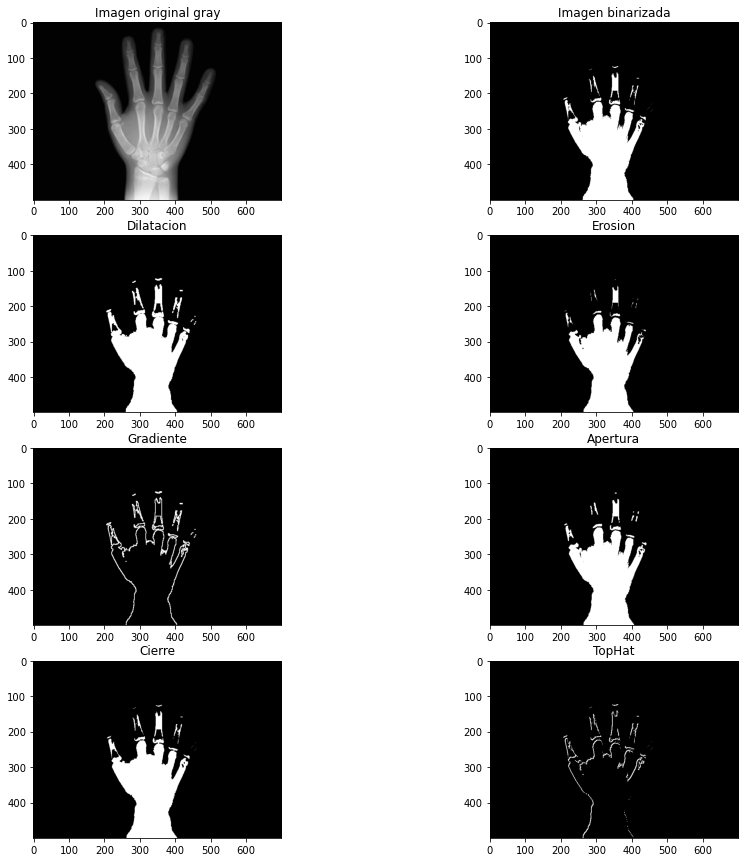

In [9]:
import cv2 #opencv para la lectura de imagen unicamente
import matplotlib.pyplot as plt #matplotlib para mostrar las imagenes embebidos en el notebook
import numpy as np #numpy para trabajar con matrices bidimensionales

#Para ejecutar las operaciones morfologicas es necesario binarizar la imagen es decir adoptar unicamente 2 valores
#0 --> Negro | 255 --> Blanco, de esta forma se podrá recién ejecutar las transformaciones

#Algoritmo de binarizado
def binarizar(img):
    m,n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra variable a fin de modificar cada pixel segun resultados
    for i in range(m): #Recorremos en ancho
        for j in range(n): #Recorremos en alto
            if img[i,j]>=128: #Si el valor del gris encontrado es >=128 definimos como valor de salida 255 -->Blanco
                imgOut[i,j]=255
            else: #Caso contrario asignamos como nuevo valor del pixel 0 -->Negro
                imgOut[i,j]=0
    return imgOut #Retornamos la nueva imagen binarizada

#Algoritmo de dilatacion para un elemento estructural tipo cuadrado
#La funcion contiene 3 argumentos: la imagen de entrada, el kernel o elemento estructural y la cantidad de veces
#deseemos se ejecute el proceso.
def dilatar(img,kernel, rep):
    m, n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra matriz a fin de modificar cada pixel segun resultados
    
    for z in range(rep): #Cantidad de veces que ejecutaremos el algoritmo
        f=np.pad(imgOut,(1,1),'edge') #Modificamos el tamaño de la matriz añadiendo 1 pixel en todo el borde a fin
                                      #de evitar desbordamiento y la almacenamos en la matriz f
        for i in range(1,m): #Recorremos en ancho
            for j in range(1,n): #Recorremos en alto
                if np.sum(kernel*f[i-1:i+2,j-1:j+2])>=255: #Si la suma de los elementos del resultante de la
                    #multiplicacion del elemento estructural y la muestra tomada de la matriz f es >=255
                    imgOut[i,j]=255 #entonces le asignamos como valor 255 --> blanco, de esta forma los pixeles
                                #vecinos a un pixel blanco adoptaran el valor 255 en un rango 3x3 recursivamente 
    
    return imgOut #retornamos la imagen resultante

#Algoritmo de erosion para un elemento estructural tipo cuadrado
#Al igual que la funcion dilatacion tiene 3 argumentos con la misma finalidad, sin embargo es obligatorio usar un
#elemento estructural 3x3 cuyos elementos son 1, caso contrario el resultado no será el esperado
def erosionar(img, kernel, rep):
    m, n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra matriz a fin de modificar cada pixel segun resultados
    
    for z in range(rep): #Cantidad de veces que ejecutaremos el algoritmo
        f=np.pad(imgOut,(1,1),'edge') #Modificamos el tamaño de la matriz añadiendo 1 pixel en todo el borde a fin
                                      #de evitar desbordamiento y la almacenamos en la matriz f
        for i in range(1,m): #Recorremos en ancho
            for j in range(1,n): #Recorremos en alto
                if np.sum(kernel*f[i-1:i+2,j-1:j+2])<255*9: #Si la suma de los elementos del resultante de la
                    #multiplicacion del elemento estructural y la muestra tomada de la matriz f es < 9*255
                    #es decir si no existiese pixel negro alguno, entonces asignamos 0 al pixel de salida 
                    imgOut[i,j]=0 #de esta forma los vecinos a un pixel blanco adoptaran el valor negro en un rango
                                  #3x3 recursivamente
    
    return imgOut #retornamos la imagen resultante


#Algoritmo de gradiente morfológico: dilatacion - erosion
def gradiente(img):
    imgD=dilatar(img,kernel,1) #obtenemos la matriz luego del proceso de dilatación para la imagen de entrada
    imgE=erosionar(img,kernel,1) #obtenemos la matriz luego del proceso de erosión para la imagen de entrada
    imgOut=img.copy() # Copiamos la imagen a fin de modificar cada pixel según la lógica del algoritmo
    m,n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    for i in range(1,m): #Recorremos en ancho
        for j in range(1,n): #Recorremos en alto
            if (imgD[i,j]-imgE[i,j])<=0: #Si la diferencia del valor del pixel de la imagen dilatada con la
                # erosionada es <=0 entonces se asigna como pixel de salida 0 --> Negro
                imgOut[i,j]=0
            else: # caso contrario se asigna 255 --> blanco
                imgOut[i,j]=255
    return imgOut #retornamos la imagen resultante

#Algoritmo de apertura: primero erosion y luego dilatacion
def apertura(img):
    img=erosionar(img,kernel,1)
    img=dilatar(img,kernel,1)
    return img

#Algoritmo de cierre: primero dilatacion y luego erosion
def cierre(img):
    img=dilatar(img,kernel,1)
    img=erosionar(img,kernel,1)
    return img

#Algoritmo de tophat: imagen original - imagen erosionada
def tophat(img):
    imgE=erosionar(img,kernel,1)
    imgOut=img.copy()
    m,n=img.shape
    for i in range(1,m):
        for j in range(1,n):
            if (img[i,j]-imgE[i,j])<=0:
                imgOut[i,j]=0
            else:
                imgOut[i,j]=255
    return imgOut

############Ejecución###############>
kernel = np.ones((3,3),np.uint8) #Definicion del elemento estructural
img=cv2.imread('placa.jpg',0) #Lectura a escala de grises

imgB=binarizar(img) #Binarizado
imgD=dilatar(imgB,kernel,1) #Dilatado
imgE=erosionar(imgB,kernel,1) #Erosionado
imgG=gradiente(imgB) #Gradiente morfologico
imgA=apertura(imgB) #Apertura
imgC=cierre(imgB) #Cierre
imgT=tophat(imgB) #Tophat

plt.figure(figsize=(15,15))
plt.subplot(421)
plt.imshow(img, cmap="gray")
plt.title("Imagen original gray")
plt.subplot(422)
plt.imshow(imgB, cmap="gray")
plt.title("Imagen binarizada")
plt.subplot(423)
plt.imshow(imgD, cmap="gray")
plt.title("Dilatacion")
plt.subplot(424)
plt.imshow(imgE, cmap="gray")
plt.title("Erosion")
plt.subplot(425)
plt.imshow(imgG, cmap="gray")
plt.title("Gradiente")
plt.subplot(426)
plt.imshow(imgA, cmap="gray")
plt.title("Apertura")
plt.subplot(427)
plt.imshow(imgC, cmap="gray")
plt.title("Cierre")
plt.subplot(428)
plt.imshow(imgT, cmap="gray")
plt.title("TopHat")